In [1]:
import pandas as pd
import numpy as np
import smogn
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,roc_auc_score,precision_score,recall_score,f1_score

In [2]:
import lightgbm as lgb
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [3]:
from sklearn.preprocessing import StandardScaler


X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [4]:
y_2_train = np.load('y_2_train.npy')
y_2_test = np.load('y_2_test.npy')
y_3_train = np.load('y_3_train.npy')
y_3_test = np.load('y_3_test.npy')

X_train_class = np.copy(X_train)
y_train_class = np.copy(y_train)
X_test_class = np.copy(X_test)
y_test_class = np.copy(y_test)

scaler = StandardScaler().fit(X_train_class)
X_train_class = scaler.transform(X_train_class)
X_test_class = scaler.transform(X_test_class)


In [5]:
volume_train = np.load('y_4_train.npy') #np.load('volume_train.npy')
volume_test = np.load('y_4_test.npy') #np.load('volume_test.npy')
intensity_train = np.load('y_5_train.npy') #np.load('intensity_train.npy')
intensity_test = np.load('y_5_test.npy') #np.load('intensity_test.npy')

In [6]:
# RRegression Values modeifications
#y_2_train[y_2_train > 10] = 10.0
#y_2_test[y_2_test > 10] = 10.0



In [7]:
#X_train = np.concatenate((X_train, volume_train.reshape(-1, 1), intensity_train.reshape(-1, 1)), axis=1)
#X_test = np.concatenate((X_test,  volume_test.reshape(-1, 1), intensity_test.reshape(-1, 1)), axis=1)

In [8]:
print(X_train.shape, X_test.shape)

(2552, 20) (639, 20)


In [9]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#lgb_train = lgb.Dataset(X_train, y_2_train)


In [11]:
print(X_train)

[[-0.45880693 -0.16513392 -0.03903187 ... -0.05575163 -0.42107293
  -0.39361402]
 [ 1.24676524  1.33336874  1.42359704 ... -0.40154262 -0.78809567
  -0.62218796]
 [ 1.63051898  1.41899747  1.46661554 ... -0.32250468 -0.49050966
  -0.49299399]
 ...
 [ 0.69245428  0.64833895  0.69228259 ...  0.14184321  0.12450142
  -0.00603212]
 [-0.92783928 -0.97860679 -1.07147581 ...  1.88067789  1.44379938
   2.40890126]
 [-1.48215024 -1.83489403 -2.23297523 ...  0.53703291  0.29313349
   0.04365787]]


In [12]:
'''
polynom_fit_SMOTE_bus,
polynom_fit_SMOTE_star,
ROSE,
Gazzah,
SPY,
MSMOTE,
AHC,
RWO_sampling,
polynom_fit_SMOTE_mesh,
polynom_fit_SMOTE_poly
'''

'\npolynom_fit_SMOTE_bus,\npolynom_fit_SMOTE_star,\nROSE,\nGazzah,\nSPY,\nMSMOTE,\nAHC,\nRWO_sampling,\npolynom_fit_SMOTE_mesh,\npolynom_fit_SMOTE_poly\n'

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import smote_variants as sv
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import sklearn.datasets as datasets
from sklearn.neural_network import MLPClassifier

dataset= {'data': X_train,
          'target': y_train,
          'name': 'Andromeda'}

classifier = LGBMClassifier(boosting_type="gbdt",is_unbalance=True, random_state=5, 
                  n_estimators=300,num_leaves=30, max_depth=2,feature_fraction=0.5, 
                  bagging_fraction=0.8, bagging_freq=15, learning_rate=0.01)




# Classifier Testing

# training the best techniques using the entire dataset
X_samp, y_samp= sv.polynom_fit_SMOTE_bus(proportion=1.0).sample(X_train, y_train)
classifier.fit(X_samp, y_samp)
preds2 = classifier.predict(X_test)
print(X_test)
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))
preds_train = classifier.predict(X_train)



2023-03-22 16:46:57,976:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2023-03-22 16:46:57,978:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[[ 0.22342193  0.04893789 -0.12506886 ... -0.96468794 -0.98648634
  -1.03958385]
 [-1.1410358  -1.10704988 -1.2005313  ... -0.46082107 -0.68890033
  -0.82094791]
 [-0.84256067 -1.06423552 -1.1575128  ... -0.4904603  -0.29211899
  -0.10541209]
 ...
 [ 0.05286472  0.22019534  0.26209761 ...  0.31967858  1.81082212
   0.98776763]
 [-0.0750532  -0.16513392 -0.16808736 ... -0.14466932 -0.43099246
  -0.30417204]
 [ 0.60717567 -0.03669083 -0.85638332 ... -0.73745386  0.52128276
   1.1169616 ]]
Acc Score:  0.5758998435054773
Roc Auc Score:  0.5089625049634126
Precision Score:  0.09923664122137404
Recall Score:  0.4262295081967213
f1 score:  0.160990

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds2)

array([[342, 236],
       [ 35,  26]], dtype=int64)

In [15]:
# Preparing prediction out
#X_test = np.concatenate((X_test, preds2.reshape(-1, 1)), axis=1)
#X_train = np.concatenate((X_train, preds_train.reshape(-1, 1)), axis=1)
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

lgb_eval = lgb.Dataset(X_test, y_2_test)

lgb_train = lgb.Dataset(X_train, y_2_train)



In [16]:
print(X_train.shape)

(2552, 20)


In [17]:
# defining parameters 
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 50,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=200)

[1]	valid_0's l1: 0.799365	valid_0's l2: 4.07411
Training until validation scores don't improve for 200 rounds
[2]	valid_0's l1: 0.799557	valid_0's l2: 4.08063
[3]	valid_0's l1: 0.798939	valid_0's l2: 4.08517
[4]	valid_0's l1: 0.798164	valid_0's l2: 4.09052
[5]	valid_0's l1: 0.796584	valid_0's l2: 4.10254
[6]	valid_0's l1: 0.794859	valid_0's l2: 4.09793
[7]	valid_0's l1: 0.795881	valid_0's l2: 4.10069
[8]	valid_0's l1: 0.797475	valid_0's l2: 4.10732
[9]	valid_0's l1: 0.797357	valid_0's l2: 4.10825
[10]	valid_0's l1: 0.797035	valid_0's l2: 4.09973
[11]	valid_0's l1: 0.796403	valid_0's l2: 4.09233
[12]	valid_0's l1: 0.796735	valid_0's l2: 4.09115
[13]	valid_0's l1: 0.796964	valid_0's l2: 4.08774
[14]	valid_0's l1: 0.801087	valid_0's l2: 4.08821
[15]	valid_0's l1: 0.799284	valid_0's l2: 4.07947
[16]	valid_0's l1: 0.796633	valid_0's l2: 4.07742
[17]	valid_0's l1: 0.79844	valid_0's l2: 4.09196
[18]	valid_0's l1: 0.801558	valid_0's l2: 4.10312
[19]	valid_0's l1: 0.800494	valid_0's l2: 4.1087

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	valid_0's l1: 0.819172	valid_0's l2: 4.30829
[41]	valid_0's l1: 0.821531	valid_0's l2: 4.31446
[42]	valid_0's l1: 0.821986	valid_0's l2: 4.31536
[43]	valid_0's l1: 0.823986	valid_0's l2: 4.32794
[44]	valid_0's l1: 0.826242	valid_0's l2: 4.33903
[45]	valid_0's l1: 0.826971	valid_0's l2: 4.34396
[46]	valid_0's l1: 0.828623	valid_0's l2: 4.35112
[47]	valid_0's l1: 0.831391	valid_0's l2: 4.36169
[48]	valid_0's l1: 0.834921	valid_0's l2: 4.37777
[49]	valid_0's l1: 0.834989	valid_0's l2: 4.37907
[50]	valid_0's l1: 0.835018	valid_0's l2: 4.37621
[51]	valid_0's l1: 0.836931	valid_0's l2: 4.38307
[52]	valid_0's l1: 0.838031	valid_0's l2: 4.38714
[53]	valid_0's l1: 0.841662	valid_0's l2: 4.40376
[54]	valid_0's l1: 0.84206	valid_0's l2: 4.39687
[55]	valid_0's l1: 0.844414	valid_0's l2: 4.39863
[56]	valid_0's l1: 0.846052	valid_0's l2: 4.40198
[57]	valid_0's l1: 0.849106	valid_0's l2: 4.41315
[58]	valid_0's l1: 0.849451	valid_0's l2: 4.41473
[59]	valid_0's l1: 0.85203	valid_0's l2: 4.41674
[6

In [18]:
preds = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [20]:
mean_squared_error(y_2_test, preds)

4.097928284290984

In [21]:
mean_absolute_error(y_2_test, preds)

0.7948587366510762

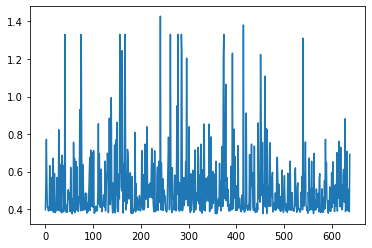

In [22]:
plt.plot(preds)

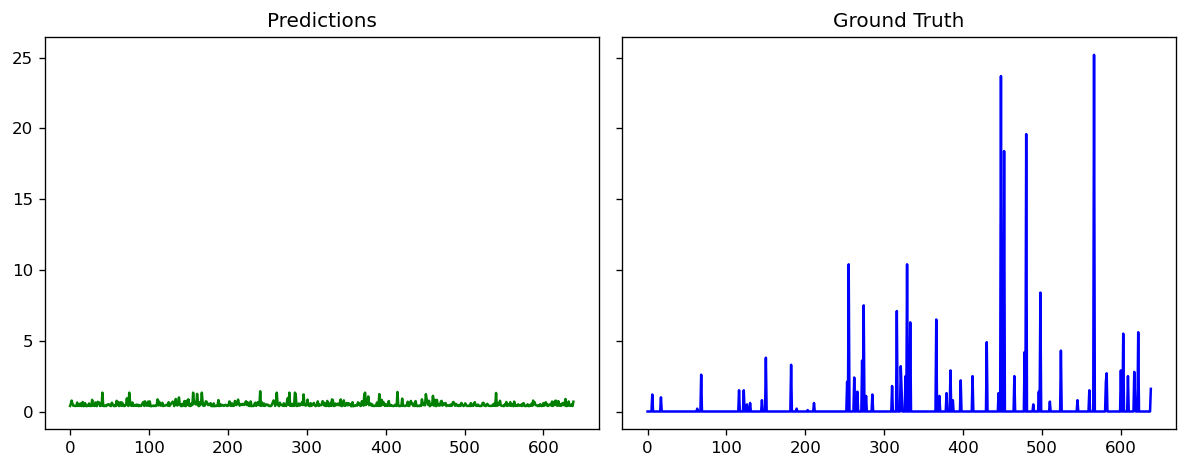

In [23]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot(preds, 'g')  # greendots
ax2.plot(y_2_test, 'b')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Predictions'); ax2.set_title('Ground Truth')

  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

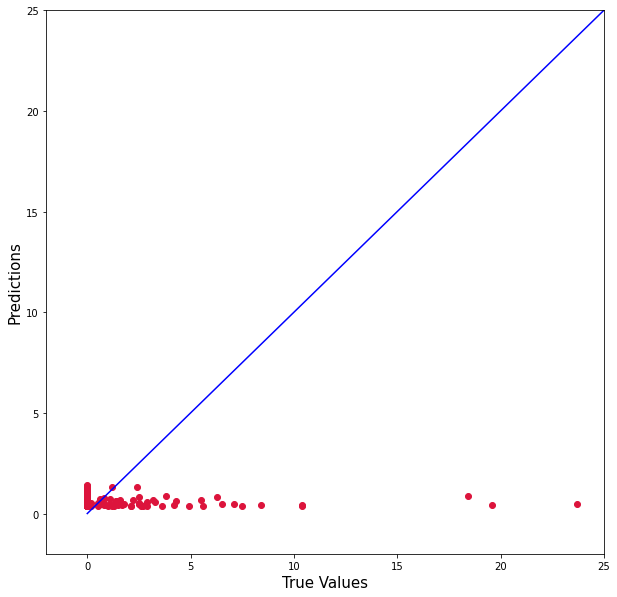

In [24]:
predicted_value = preds
true_value = y_2_test
fig = plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.xlim([-2, 25])
plt.ylim([-2, 25])
plt.show()
fig.savefig('predictions_vs_true_basic_measurements_lgbm.pdf')

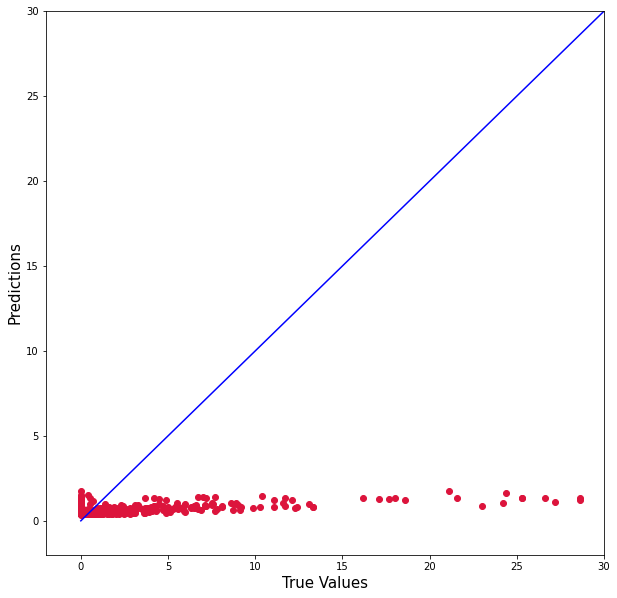

<Figure size 432x288 with 0 Axes>

In [25]:

predicted_value = model.predict(X_train)
true_value = y_2_train
fig = plt.figure(figsize=(10,10))

plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.xlim([-2, 30])
plt.ylim([-2, 30])
plt.show()

fig=plt.savefig('predictions_vs_true_readl_precipitation_training.pdf')

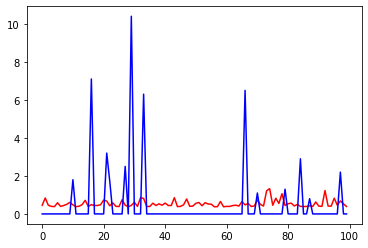

In [26]:
temp_true  = np.copy(y_2_test)
#temp_true[temp_true > 0] = 5
#preds[preds > 0] = 2
plt.plot(preds[300:400],'r', label='Prediction')
plt.plot(temp_true[300:400],'b', label='Ground Truth')
plt.show()

In [27]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
#temp_y_train = np.copy(y_2_train)
#temp_y_test = np.copy(y_2_test)
#temp_y_train[temp_y_train > 5] = 5.0
#temp_y_test[temp_y_train > 5] = 5.0


In [29]:
np.digitize(y_test, [0, 1]) - 1
nb_classes = 2
y_train = np.eye(nb_classes)[y_train]
y_test = np.eye(nb_classes)[y_test]

import keras
from keras.layers import Dense, Softmax
model = keras.Sequential()
#model.add(Dense(69, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(16, kernel_initializer='normal', activation='relu', input_shape=(20,)))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal', activation='softmax'))
#loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy', )
model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=300, batch_size=64, shuffle=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_test)

print('Acc Score: ',accuracy_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1)))
print('Roc Auc Score: ',roc_auc_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1)))
#print('Precision Score: ',precision_score(y_test, preds))
#print('Recall Score: ',recall_score(y_test, preds))
print('f1 score: ',f1_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1)))


Epoch 1/300
40/40 [==============================] - 1s 8ms/step - loss: 0.6689 - accuracy: 0.8993 - val_loss: 0.6354 - val_accuracy: 0.9045
Epoch 2/300
40/40 [==============================] - 0s 3ms/step - loss: 0.5674 - accuracy: 0.9052 - val_loss: 0.4820 - val_accuracy: 0.9045
Epoch 3/300
40/40 [==============================] - 0s 3ms/step - loss: 0.3982 - accuracy: 0.9052 - val_loss: 0.3660 - val_accuracy: 0.9045
Epoch 4/300
40/40 [==============================] - 0s 3ms/step - loss: 0.3430 - accuracy: 0.9052 - val_loss: 0.3505 - val_accuracy: 0.9045
Epoch 5/300
40/40 [==============================] - 0s 3ms/step - loss: 0.3351 - accuracy: 0.9052 - val_loss: 0.3428 - val_accuracy: 0.9045
Epoch 6/300
40/40 [==============================] - 0s 4ms/step - loss: 0.3305 - accuracy: 0.9052 - val_loss: 0.3388 - val_accuracy: 0.9045
Epoch 7/300
40/40 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.9052 - val_loss: 0.3352 - val_accuracy: 0.9045
Epoch 8/300
4

Epoch 59/300
40/40 [==============================] - 0s 3ms/step - loss: 0.3036 - accuracy: 0.9052 - val_loss: 0.3153 - val_accuracy: 0.9045
Epoch 60/300
40/40 [==============================] - 0s 3ms/step - loss: 0.3039 - accuracy: 0.9052 - val_loss: 0.3152 - val_accuracy: 0.9045
Epoch 61/300
40/40 [==============================] - 0s 3ms/step - loss: 0.3036 - accuracy: 0.9052 - val_loss: 0.3157 - val_accuracy: 0.9045
Epoch 62/300
40/40 [==============================] - 0s 3ms/step - loss: 0.3032 - accuracy: 0.9052 - val_loss: 0.3145 - val_accuracy: 0.9045
Epoch 63/300
40/40 [==============================] - 0s 3ms/step - loss: 0.3036 - accuracy: 0.9052 - val_loss: 0.3125 - val_accuracy: 0.9045
Epoch 64/300
40/40 [==============================] - 0s 3ms/step - loss: 0.3037 - accuracy: 0.9052 - val_loss: 0.3129 - val_accuracy: 0.9045
Epoch 65/300
40/40 [==============================] - 0s 3ms/step - loss: 0.3033 - accuracy: 0.9052 - val_loss: 0.3142 - val_accuracy: 0.9045
Epoch 

40/40 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.9052 - val_loss: 0.3153 - val_accuracy: 0.9045
Epoch 117/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.9052 - val_loss: 0.3168 - val_accuracy: 0.9045
Epoch 118/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.9052 - val_loss: 0.3175 - val_accuracy: 0.9045
Epoch 119/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.9052 - val_loss: 0.3149 - val_accuracy: 0.9045
Epoch 120/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.9052 - val_loss: 0.3164 - val_accuracy: 0.9045
Epoch 121/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.9052 - val_loss: 0.3164 - val_accuracy: 0.9045
Epoch 122/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.9052 - val_loss: 0.3171 - val_accuracy: 0.9045
Epoch 123/300

40/40 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.9052 - val_loss: 0.3194 - val_accuracy: 0.9045
Epoch 174/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.9052 - val_loss: 0.3200 - val_accuracy: 0.9045
Epoch 175/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.9052 - val_loss: 0.3196 - val_accuracy: 0.9045
Epoch 176/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.9052 - val_loss: 0.3192 - val_accuracy: 0.9045
Epoch 177/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.9052 - val_loss: 0.3183 - val_accuracy: 0.9045
Epoch 178/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.9052 - val_loss: 0.3214 - val_accuracy: 0.9045
Epoch 179/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9052 - val_loss: 0.3228 - val_accuracy: 0.9045
Epoch 180/300

40/40 [==============================] - 0s 3ms/step - loss: 0.2906 - accuracy: 0.9052 - val_loss: 0.3259 - val_accuracy: 0.9045
Epoch 231/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.9052 - val_loss: 0.3265 - val_accuracy: 0.9045
Epoch 232/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.9052 - val_loss: 0.3272 - val_accuracy: 0.9045
Epoch 233/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.9052 - val_loss: 0.3222 - val_accuracy: 0.9045
Epoch 234/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.9052 - val_loss: 0.3257 - val_accuracy: 0.9045
Epoch 235/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.9052 - val_loss: 0.3254 - val_accuracy: 0.9045
Epoch 236/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 0.9052 - val_loss: 0.3267 - val_accuracy: 0.9045
Epoch 237/300

40/40 [==============================] - 0s 2ms/step - loss: 0.2891 - accuracy: 0.9056 - val_loss: 0.3315 - val_accuracy: 0.9045
Epoch 288/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.9060 - val_loss: 0.3262 - val_accuracy: 0.9045
Epoch 289/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.9056 - val_loss: 0.3328 - val_accuracy: 0.9045
Epoch 290/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.9056 - val_loss: 0.3320 - val_accuracy: 0.9045
Epoch 291/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.9056 - val_loss: 0.3318 - val_accuracy: 0.9045
Epoch 292/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.9056 - val_loss: 0.3297 - val_accuracy: 0.9045
Epoch 293/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.9060 - val_loss: 0.3311 - val_accuracy: 0.9045
Epoch 294/300

In [30]:
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(preds, axis=1))

array([[578,   0],
       [ 61,   0]], dtype=int64)

In [31]:
#mean_squared_error(y_2_test, preds)

In [32]:
#mean_absolute_error(y_2_test, preds)

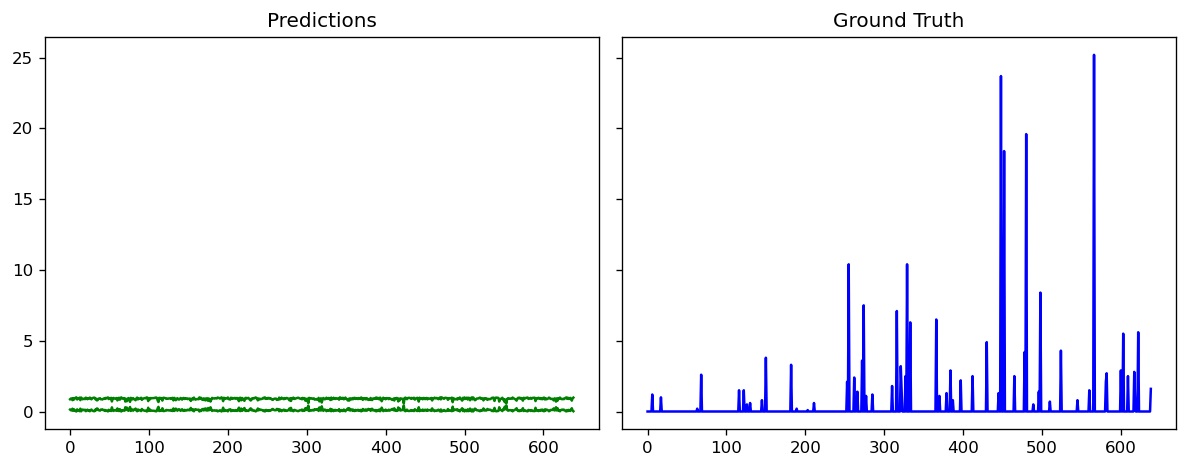

In [33]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot(preds, 'g')  # greendots
ax2.plot(y_2_test, 'b')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Predictions'); ax2.set_title('Ground Truth')

  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

In [34]:
classifier.feature_importances_

array([ 13,  32,  97,  21,  20,  59,  18,  55,  39,  18,  24,  15,  10,
        10,  97,  67, 113,  54,  79,  59])

In [35]:
features = ['HR-1', 'HR-2', 'HR-3', 'HR-4', 'HR-5', 'PB-1', 'PB-2', 'PB-3', 'PB-4','PB-5', 'T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'VV-1', 'VV-2', 'VV-3','VV-4', 'VV-5', 'vol', 'intensity']

In [36]:
#plt.figure(figsize=(15, 5), dpi=80)

#plt.bar(features, classifier.feature_importances_ / np.sum(classifier.feature_importances_))

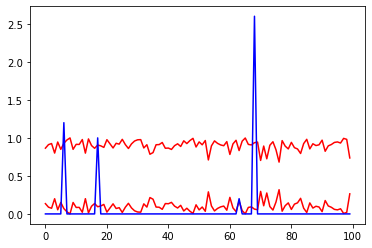

In [37]:
temp_true  = np.copy(y_2_test)
#temp_true[temp_true > 0] = 5
#preds[preds > 0] = 2
plt.plot(preds[0:100],'r', label='Prediction')
plt.plot(temp_true[0:100],'b', label='Ground Truth')
plt.show()

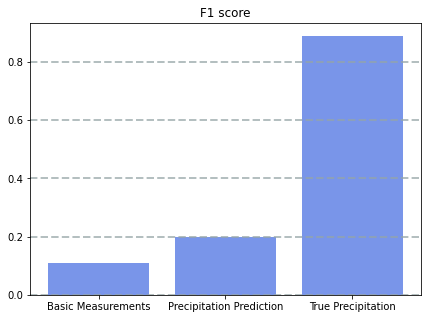

In [38]:
data = [0.11, 0.198, 0.89]

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)

x = ['Basic Measurements', 'Precipitation Prediction', 'True Precipitation']
plt.xticks(range(len(data)), x)

plt.bar(range(len(x)), data, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("F1 score")
plt.show()

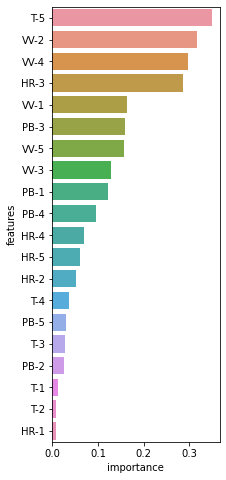

In [45]:
# plot feature importance
import seaborn as sns
features = ['HR-1', 'HR-2', 'HR-3', 'HR-4', 'HR-5', 'PB-1', 'PB-2', 'PB-3', 'PB-4','PB-5', 'T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'VV-1', 'VV-2', 'VV-3','VV-4', 'VV-5']
fi_df = pd.DataFrame(features, columns=['features'])
fi_df['importance'] = classifier.booster_.feature_importance(importance_type="gain") / 15000
fig, ax = plt.subplots(1, 1, figsize=(3, 8))
sns.barplot(
    x='importance'
    , y='features'
    , data=fi_df.sort_values(by=['importance'], ascending=False)
    , ax=ax
)

fig.savefig("feature_importance_basic_measurements.pdf",bbox_inches='tight')


In [41]:
import keras
from keras.layers import Dense, Softmax
model = keras.Sequential()
#model.add(Dense(69, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(12, kernel_initializer='normal', activation='relu', input_shape=(20,)))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='relu'))
model.compile(loss='mse', optimizer='Adam', metrics='mse', )
model.fit(X_train, y_2_train, validation_data=(X_test, y_2_test), verbose=1, epochs=30, batch_size=64, shuffle=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_test)

print('mse: ',mean_squared_error(y_2_test, preds))
print('mae: ',mean_absolute_error(y_2_test, preds))



Epoch 1/30
40/40 [==============================] - 0s 4ms/step - loss: 7.9661 - mse: 7.9661 - val_loss: 4.1629 - val_mse: 4.1629
Epoch 2/30
40/40 [==============================] - 0s 2ms/step - loss: 7.9011 - mse: 7.9011 - val_loss: 4.1017 - val_mse: 4.1017
Epoch 3/30
40/40 [==============================] - 0s 2ms/step - loss: 7.8122 - mse: 7.8122 - val_loss: 4.0590 - val_mse: 4.0590
Epoch 4/30
40/40 [==============================] - 0s 1ms/step - loss: 7.7640 - mse: 7.7640 - val_loss: 4.0622 - val_mse: 4.0622
Epoch 5/30
40/40 [==============================] - 0s 2ms/step - loss: 7.7481 - mse: 7.7481 - val_loss: 4.0610 - val_mse: 4.0610
Epoch 6/30
40/40 [==============================] - 0s 2ms/step - loss: 7.7375 - mse: 7.7375 - val_loss: 4.0566 - val_mse: 4.0566
Epoch 7/30
40/40 [==============================] - 0s 2ms/step - loss: 7.7289 - mse: 7.7289 - val_loss: 4.0600 - val_mse: 4.0600
Epoch 8/30
40/40 [==============================] - 0s 2ms/step - loss: 7.7229 - mse: 7.72

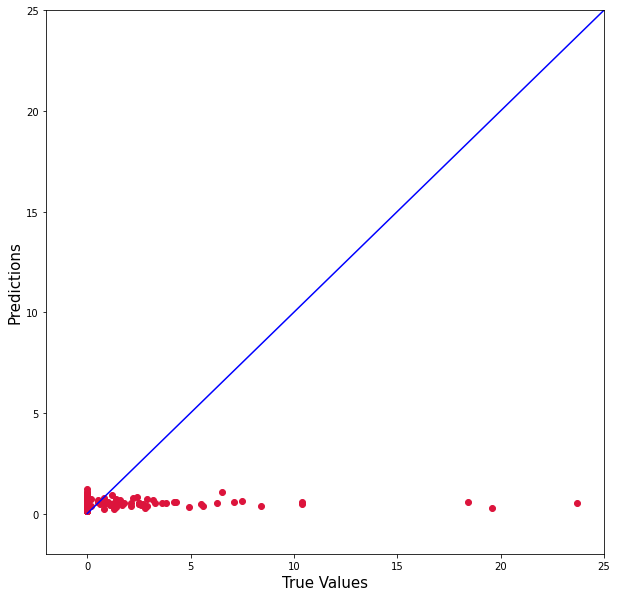

In [42]:
predicted_value = preds
true_value = y_2_test
fig = plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.xlim([-2, 25])
plt.ylim([-2, 25])
plt.show()
fig.savefig('predictions_vs_true_basic_measurements_dnn.pdf')